Student Performance Prediction

In [101]:
# Step 1: Import Libraries
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import numpy as np

In [102]:
# Step 2: Read the CSV File
df = pd.read_csv(r"C:\Users\harsha\Downloads\archive\Student_performance_data _.csv")

In [103]:
# Step 3: Data Exploration and Preprocessing
df


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [105]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [106]:
# Encoding categorical variables
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

In [107]:
# Check for missing values
print(df.isnull().sum())

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


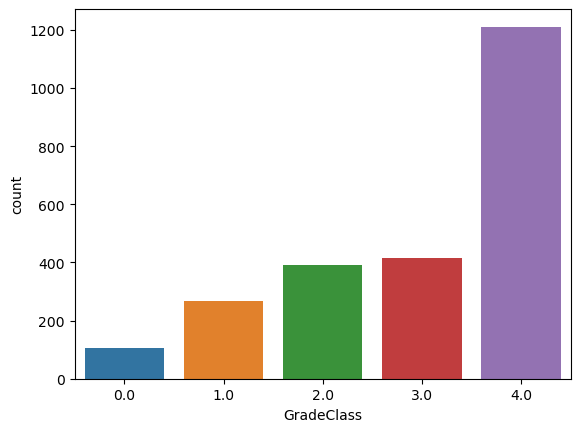

In [108]:
# Step 4: Visualization
# Countplot for target variable 'Class'
sns.countplot(x='GradeClass', data=df)
plt.show()

In [109]:
df.corr()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
StudentID,1.000000,-0.042255,-0.014625,-0.012990,-0.002307,0.026976,0.014841,-0.007834,0.003016,-0.003611,-0.020703,-0.005468,0.008011,-0.002697,-0.098500
Age,-0.042255,1.000000,0.044895,-0.028473,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,0.000275,-0.006250
Gender,-0.014625,0.044895,1.000000,0.016010,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,0.007109,-0.000200,-0.013360,0.022998
Ethnicity,-0.012990,-0.028473,0.016010,1.000000,0.033595,0.007184,-0.025712,-0.017440,0.020922,-0.008927,-0.004484,-0.014627,0.013468,0.027760,-0.023326
ParentalEducation,-0.002307,0.025099,0.006771,0.033595,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,-0.035854,0.041031
StudyTimeWeekly,0.026976,-0.006800,0.011469,0.007184,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,0.179275,-0.134131
Absences,0.014841,-0.011511,0.021479,-0.025712,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,-0.919314,0.728633
Tutoring,-0.007834,-0.012076,-0.031597,-0.017440,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,0.145119,-0.111695
ParentalSupport,0.003016,0.033197,0.008065,0.020922,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,0.190774,-0.136823
Extracurricular,-0.003611,-0.025061,-0.005964,-0.008927,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,0.094078,-0.069733


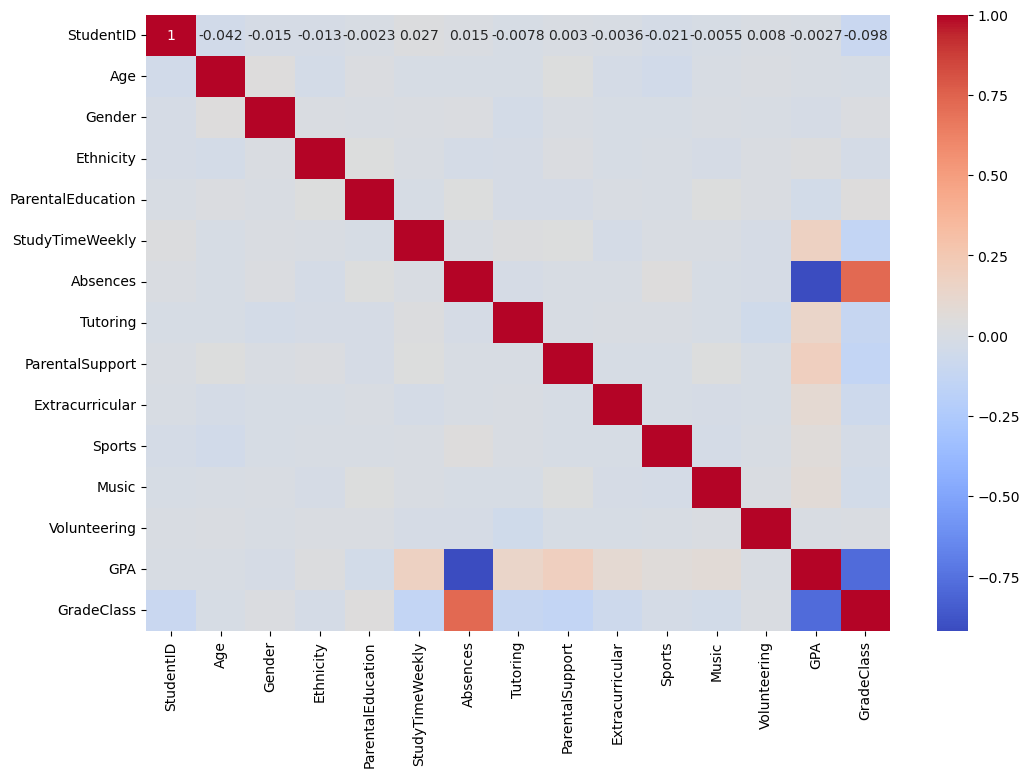

In [110]:
# Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [111]:
# Step 5: Feature Selection
# Define features (X) and target (y)
X = df.drop(['GradeClass', 'StudentID'], axis=1)
y = df['GradeClass']

In [112]:
X

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297


In [113]:
y

0       2.0
1       1.0
2       4.0
3       3.0
4       4.0
       ... 
2387    0.0
2388    4.0
2389    2.0
2390    1.0
2391    1.0
Name: GradeClass, Length: 2392, dtype: float64

In [114]:
# Step 6: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [115]:
df.shape

(2392, 15)

In [116]:
X_train.shape

(1674, 13)

In [117]:
X_test.shape

(718, 13)

In [118]:
# Step 7: Train the Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

C:\Users\harsha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [119]:
# Step 8: Evaluate the Model
y_pred = log_reg.predict(X_test)
y_pred

array([4., 2., 4., 1., 4., 3., 4., 3., 3., 4., 3., 4., 1., 3., 2., 4., 4.,
       4., 4., 3., 4., 4., 4., 2., 4., 4., 4., 2., 3., 3., 4., 4., 1., 1.,
       4., 4., 1., 2., 0., 4., 2., 1., 4., 4., 4., 3., 2., 4., 1., 4., 2.,
       1., 4., 4., 4., 0., 3., 1., 4., 4., 4., 4., 2., 4., 4., 3., 1., 3.,
       4., 1., 1., 4., 2., 2., 4., 2., 4., 4., 4., 4., 4., 1., 3., 4., 4.,
       4., 1., 4., 4., 4., 2., 4., 4., 4., 4., 4., 1., 4., 4., 4., 4., 3.,
       4., 4., 4., 3., 2., 4., 4., 4., 4., 3., 1., 4., 4., 4., 4., 2., 4.,
       3., 4., 1., 1., 4., 4., 4., 1., 4., 3., 2., 4., 1., 2., 4., 4., 4.,
       3., 4., 4., 4., 2., 4., 2., 4., 2., 4., 4., 3., 1., 4., 0., 4., 1.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 2., 1.,
       4., 1., 2., 4., 4., 3., 2., 4., 3., 4., 2., 4., 4., 2., 2., 2., 1.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 2., 2., 4., 2., 4., 4.,
       3., 3., 4., 2., 3., 4., 4., 4., 4., 2., 2., 4., 2., 1., 4., 2., 4.,
       2., 1., 4., 4., 4.

In [120]:
print(confusion_matrix(y_test, y_pred))

[[  1  21   3   4   4]
 [  5  43  24   2   6]
 [  1  13  80  20   7]
 [  0   2  23  69  33]
 [  0   2   2   5 348]]


In [121]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.14      0.03      0.05        33
         1.0       0.53      0.54      0.53        80
         2.0       0.61      0.66      0.63       121
         3.0       0.69      0.54      0.61       127
         4.0       0.87      0.97      0.92       357

    accuracy                           0.75       718
   macro avg       0.57      0.55      0.55       718
weighted avg       0.72      0.75      0.73       718



In [122]:
accuracy_score(y_test, y_pred) * 100

75.34818941504177

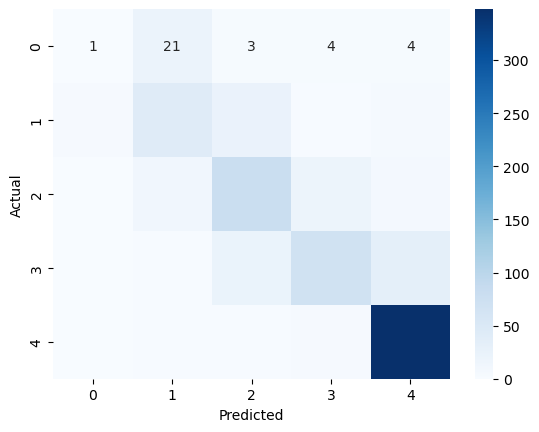

In [123]:
# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()